# Introduction

    The US Adult Census dataset is a repository of 48,842 entries extracted from the 1994 US
    Census database.
    
    In our first section, we explore the data at face value in order to understand the trends and
    representations of certain demographics in the corpus. We then use this information in section
    two to form models to predict whether an individual made more or less than 50K in 1994.

    In the third section, we look into a couple papers written on the dataset to find out what
    methods they are using to gain insight on the same data. Finally, in the fourth section, we
    compare our models as well as that of others in order to find out what features are of
    significance, what methods are most effective, and gain an understanding of some of the
    intuition behind the numbers.
    
# Dataset 

    The Census Income dataset has 48,842 entries. Each entry contains the following information
    about an individual:
    ● Age: the age of an individual
            ○ Integer greater than 0
    ● Workclass: a general term to represent the employment status of an individual
                 Private, Self_emp_not_inc, Self_emp_inc, Federal_gov, Local_gov, State_gov,
                    Without_pay, Never_worked.
    ● Fnlwgt: final weight. In other words, this is the number of people the census believes
              the entry represents.. Integer greater than 0
    ● Education: the highest level of education achieved by an individual.Bachelors, 
                 Some_college, 11th, HS_grad, Prof_school, Assoc_acdm, Assoc_voc,9th, 7th_8th, 12th,
                 Masters,1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    ● Education_num: the highest level of education achieved in numerical form.
                     Integer greater than 0
    ● Marital_status:marital status of an individual. Married_civ_spouse corresponds to a
                      civilian spouse while Married_AF_spouse is a spouse in the Armed Forces.
                       Married_civ_spouse, Divorced, Never_married, Separated, Widowed, Married_spouse_absent, 
                       Married_AF_spouse.
    ● Occupation:the general type of occupation of an individual , Tech_support, Craft_repair, Other_service, Sales,   
                  Exec_managerial, Prof_specialty, Handlers_cleaners, Machine_op_inspct, Adm_clerical, Farming_fishing, 
                  Transport_moving, Priv_house_serv, Protective_serv, Armed_Forces.
    ● Relationship:represents what this individual is relative to others. For example an individual could be a Husband. 
                    Each entry only has one relationship attribute and is
                    somewhat redundant with marital status. We might not make use of this attribute at all Wife, Own_hild, 
                    Husband, Not_in_family, Other_relative, Unmarried.
    ● Race: Descriptions of an individual’s race --> White, Asian_Pac_Islander, Amer_Indian_Eskimo, Other, Black.
    ● Sex: the biological sex of the individual
           Male, Female
    ● Capital_gain:capital gains for an individual
                   Integer greater than or equal to 0
    ● Capital_loss: capital loss for an individual
                    Integer greater than or equal to 0
    ● Hours_per_week: the hours an individual has reported to work per week
                      continuous.
    ● Native_country: country of origin for an individual
                      United_States, Cambodia, England, Puerto_Rico, Canada, Germany, Outlying_US(Guam_USVI etc), India, 
                      Japan,Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, 
                      Mexico,Portugal,Ireland, France, Dominican_Republic, Laos, Ecuador, Taiwan, 
                      Haiti, Columbia, Hungary, Guatemala,Nicaragua, Scotland, Thailand, Yugoslavia, 
                      El_Salvador,Trinadad&Tobago, Peru, Hong, Holand Netherlands.
    ● Income: whether or not an individual makes more than $50,000 annually.
              <=50k, >50k

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
import warnings 
warnings.filterwarnings('ignore')

#pd.set_option('display.max_rows',60000)

In [94]:
df = pd.read_csv("census_income.csv")

In [95]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [96]:
df.shape

(32560, 15)

### Observation:-
1. There are 15 variable in this data set, Income is Target variable, we will convert this object/string type data into categorical data(0 for <=50k and 1 for >50).


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [98]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

## Observation:- 
1. We can see that Workclass column contain ? marks as value, and total count of ?/missing value is 1836 for WorkClass column

2. we wil check other columns as well where such special charecters present.

3. We will replace ? mark with NaN value in dataset. we will raplce missin gvalue with mode of the column.

4. there are 8 type of category in Workclass.



In [99]:
for i in df.columns:
    df[i].replace(' ?', np.nan, inplace=True)

In [100]:
df.head(100)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
96,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
97,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K
98,32,Federal-gov,249409,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K


In [101]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<AxesSubplot:>

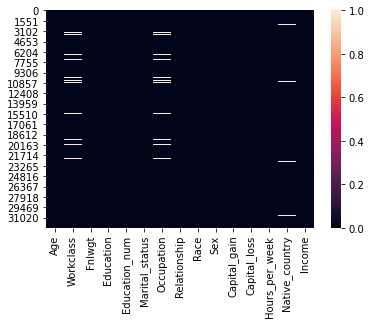

In [102]:
import seaborn as sns
sns.heatmap(df.isnull())

### Observation:-
Three columns(Workclass, Occupation,Native_country) has Null values. Frequencey of missing value is not very high. we will replace missing value with the mode of the columns.

### Filling missing values with mode of the column because these three columns are contain categorical data.

In [103]:
null_columns =['Workclass','Occupation','Native_country']
for i in null_columns:
    df.fillna(df[i].mode()[0], inplace=True)

<AxesSubplot:>

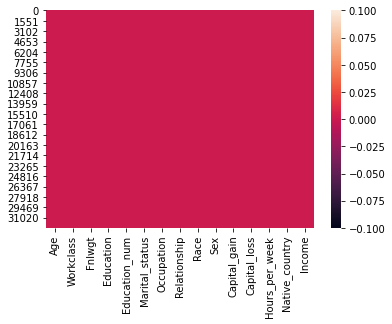

In [104]:
sns.heatmap(df.isnull())

##### No missing value now.

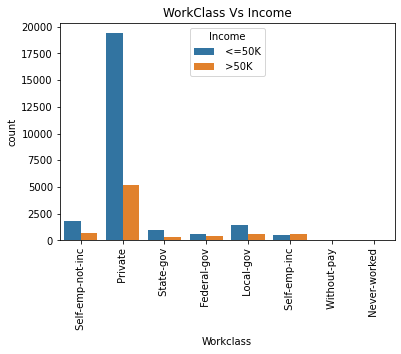

In [105]:
sns.countplot(x=df['Workclass'], hue=df['Income'])
plt.title("WorkClass Vs Income")
plt.xticks(rotation = 90)
plt.show()

### Observation:- 
Highest number of employee getting low salary comes from private sector, count of total private worker is very high as compare to other sector but still number of employee not earning more then 50K is also high in this sector.

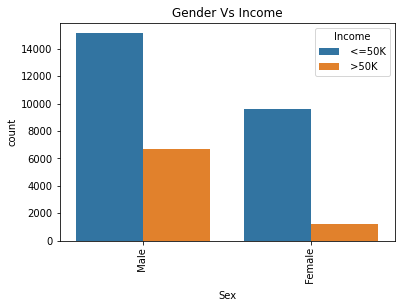

In [106]:
sns.countplot(df['Sex'], hue=df['Income'])
plt.title("Gender Vs Income")
plt.xticks(rotation = 90)
plt.show()

### Observation:-

Female employee has comparatively less income then Male employee.

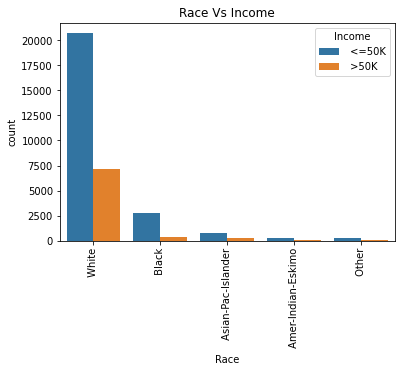

In [107]:
sns.countplot(x=df['Race'], hue=df['Income'])
plt.title("Race Vs Income")
plt.xticks(rotation = 90)
plt.show()

### Observation:- 
1. This is data comes from US hence most of the employee cataegorized comes from white race, here we can see highest no of employee belogs to while race and as compare the their number employee getting less then 50K salary is higest in this race only.
2. employee from other Race also not get very much but % of such people is high in white.


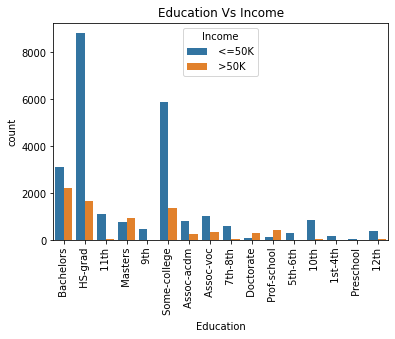

In [108]:
sns.countplot(x=df['Education'], hue=df['Income'])
plt.title("Education Vs Income")
plt.xticks(rotation = 90)
plt.show()

### Observation:-

HIghest difference of salary can be seen in employee having  HS-Grade and Some-Collage level education. 

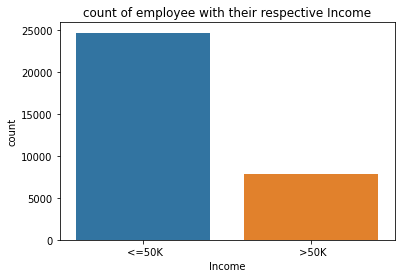

In [109]:
sns.countplot(df['Income'])
plt.title("count of employee with their respective Income")
plt.show()

## Observation:-
1. Employee getting salary less then 50K is very high, overall we can say data is imbalanced and we need to apply oversampling or undersamplaling in this case.
2. We can say maximum employee not getting more then 50k salary as compare to total no of employee in US.

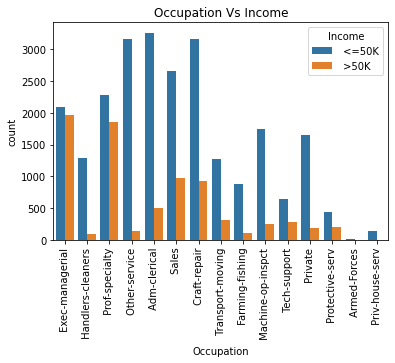

In [110]:
sns.countplot(x=df['Occupation'], hue=df['Income'])
plt.title("Occupation Vs Income")
plt.xticks(rotation = 90)
plt.show()

### Observation:-
1. Some occupation like Exec-Manageral, Prof-Speciality, maximum employee get good salary if they choose this occupation.
2. Other-service has high number of employee but pay of these employee are not crossing 50K

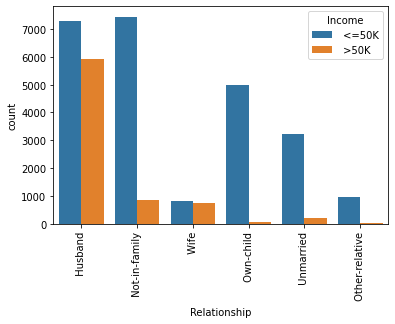

In [111]:
sns.countplot(x=df['Relationship'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

1. Married Male has good pay in US, don't know reason but above graph show that much more no of husbands getting salary more then 50K.
2. highest no of those employee who are not in family not getting very much salary. their salary not crossing 50k.
3. maximum Wife's also getting good salary. although total no of woking married female are less compare to married males.

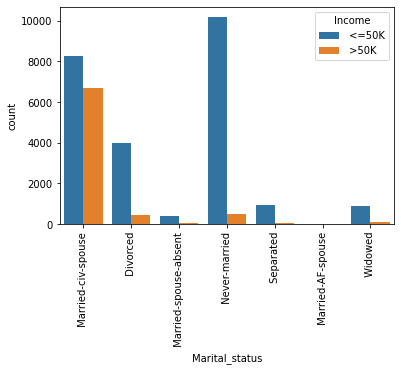

In [112]:
sns.countplot(x=df['Marital_status'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

### Observation:- 
Working bachlor's getting less then 50k which is expacted because they are fresher in their domain and getting high salary require more experience.

<AxesSubplot:xlabel='Age', ylabel='Density'>

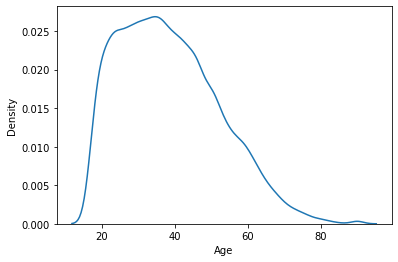

In [113]:
sns.kdeplot(data=df, x=df['Age'])

### Observation:-
Maximum Employee taken part in  tis survay belogs to 18 to 40 year of age. 

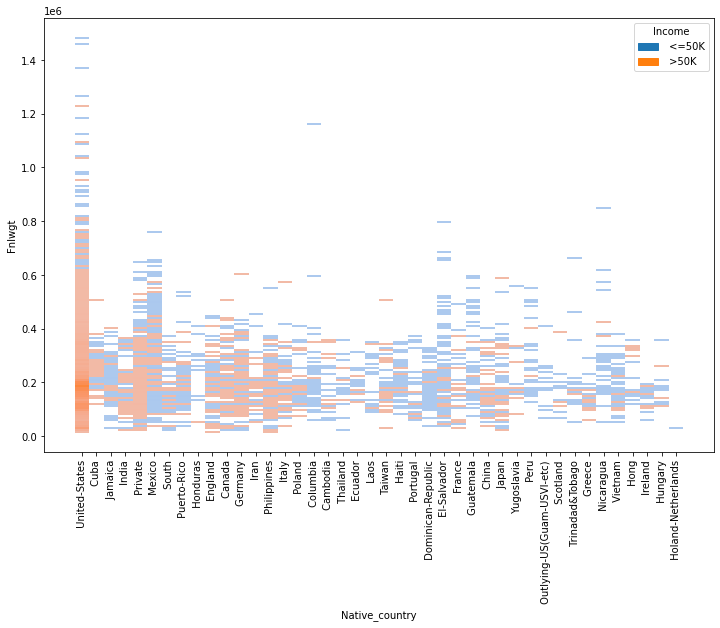

In [114]:
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Native_country', y='Fnlwgt', hue='Income')
plt.xticks(rotation = 90)
plt.show()

### Obsarvation:- 
Final Weight variable has some confusing numbers because this is related to US. other cuntries have their own weight system, 

In above graph we can see US employee having less weight getting good pay,

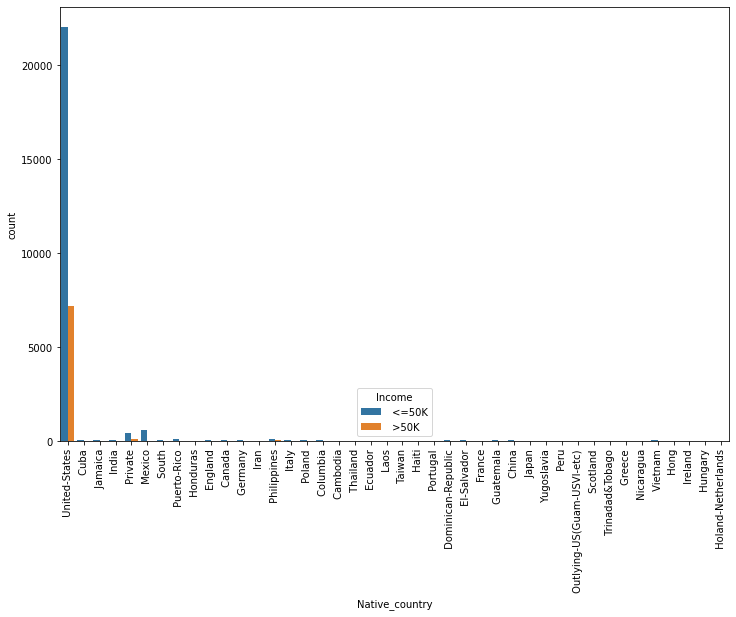

In [115]:
fig=plt.figure(figsize=(12,8))
sns.countplot(x=df['Native_country'], hue=df['Income'])
plt.xticks(rotation = 90)
plt.show()

### Observation:-

Country wise sagrigation show that data mostly related to US. 

<AxesSubplot:xlabel='Capital_gain', ylabel='Count'>

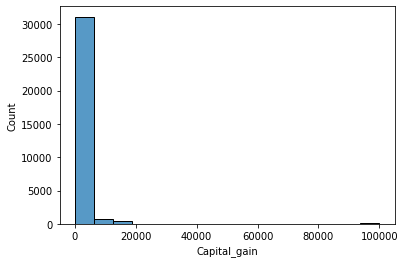

In [116]:
sns.histplot(data=df,x='Capital_gain')

### Observation:-
1. Maximum employee has no capital gain from their earning.
2. some people has capital gain when they are working, this capital gain will be showing in outlier but this seems to be a genuine capital gain from their earning hence we are not going to remove outlier , otherwise importent data will be loss.

<AxesSubplot:xlabel='Capital_loss', ylabel='Count'>

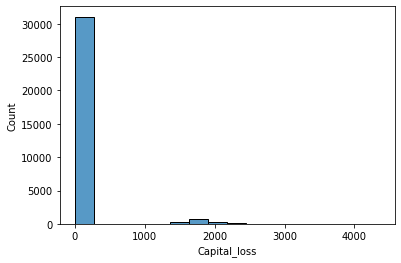

In [117]:
sns.histplot(data=df,x='Capital_loss')

### Observation:-
1. Maximum employee has no capital loss during their earning.
2. some people has capital loss when they are working, this capital loss will be showing as outlier but this seems to be a genuine capital loss from their earning hence we are not going to remove outlier , otherwise importent data will be loss.

In [118]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [122]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['Income']= label_encoder.fit_transform(df['Income']) 
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [123]:
corr_matrix = df.corr()
corr_matrix['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Capital_loss      0.150523
Fnlwgt           -0.009481
Name: Income, dtype: float64

## Observation:- 
1. Workclass has very low correlation with income . while it is assume that workclass has good impact in income of a person which is somehow now correct .
2. Education_num has strong correlation with Income.
2. Age,Hours_per_week,Capital_gain,Sex also  has strong possitive correlation with income.
3. Relation ship and marital staus impact income. it has nageive correlation with Income.
4. Fnlwgt have very less nagetive correlation with Income , hence we can delete this column. 

### Encoding different columns which having classification data.

In [124]:
#### Encoding Gender categrical Features: ##########
column = ['Workclass','Marital_status','Occupation','Relationship','Race','Sex', 'Native_country','Education']
for i in column:
    df[i] = pd.Categorical(df[i])
    dfDummies = pd.get_dummies(df[i], prefix = i)
    df = pd.concat([df, dfDummies], axis=1)
    df.drop(columns=i,inplace=True)


In [125]:
df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [126]:
df=df.drop('Fnlwgt', axis=1)

In [127]:
df.describe()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,...,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,1077.615172,87.306511,40.437469,0.240817,0.029484,0.064281,0.000215,0.753440,...,0.015786,0.032770,0.042445,0.164435,0.012684,0.322512,0.052918,0.001566,0.017690,0.223925
std,13.640642,2.572709,7385.402999,402.966116,12.347618,0.427586,0.169161,0.245257,0.014661,0.431015,...,0.124650,0.178038,0.201605,0.370675,0.111910,0.467445,0.223873,0.039547,0.131826,0.416879
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Observation:-
1. Count is same in all column means there is not missing value.
2. Mean and Median(50 percentile) is almost same for age  and hours per week variable , other variables are categorical except capital gain and capital loss.
3. Capital gain and capital loss has very big difference in mean and max value , it indicate that there are some abnormal data prasent in these two variable.but these gain and loss seems to be genuine and removel of these outlier will set this column to zero which is not correct.

### Check For outlier in Capital gain and Capital loss variable.

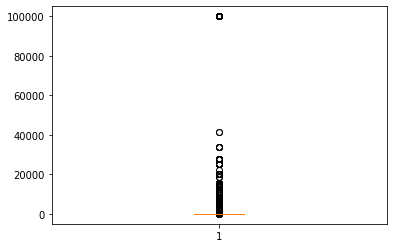

In [128]:
plt.boxplot(df.Capital_gain)
plt.show()

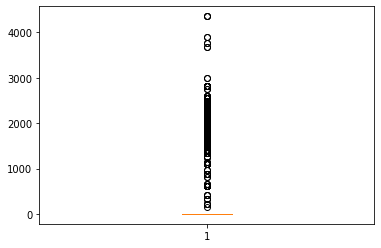

In [129]:
plt.boxplot(df.Capital_loss)
plt.show()

In [130]:
def outlier_IQR(data_frame, feature_name):
  IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
  lower_bridge = data_frame[feature_name].quantile(0.25) -(IQR*3)
  upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
  return (lower_bridge,upper_bridge)

In [131]:
l,u = outlier_IQR(df, 'Capital_loss')
df.drop(df[ (df.Capital_loss > u) | (df.Capital_loss < l) ].index, inplace=True)

In [132]:
l,u = outlier_IQR(df, 'Capital_gain')
df.drop(df[ (df.Capital_gain > u) | (df.Capital_gain < l) ].index, inplace=True)

## Observation:-
Outlier exist in Capital loss and Capital gain independent variable. but it seems to be genuine value hence we are not removing them.

# Split dataset in x and y 

In [133]:
x = df.drop(['Income'], axis = 1)
y = df['Income']

In [134]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
column = x.columns
x = scale.fit_transform(x)
x = pd.DataFrame(x,columns=column)

## Observation:-
Capital gain, Capital loss are two continuous variable has skewness, these two variable has string pssitive correlation with income.

### Normalize Data

In [135]:
x.skew()

Age                         0.596681
Education_num              -0.335779
Capital_gain                0.000000
Capital_loss                0.000000
Hours_per_week              0.227554
                             ...    
Education_ HS-grad          0.711923
Education_ Masters          4.340783
Education_ Preschool       24.491450
Education_ Prof-school      8.664006
Education_ Some-college     1.279195
Length: 106, dtype: float64

## Check for Best Random State

In [136]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.8630869611723179 on Random_state 165


In [725]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=165)

# Handling Imbalance dataset using Oversampling.

In [137]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of x_train: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3623
Before OverSampling, counts of label '0': 15358 

After OverSampling, the shape of x_train: (30716, 106)
After OverSampling, the shape of y_train: (30716,) 

After OverSampling, counts of label '1': 15358
After OverSampling, counts of label '0': 15358


In [138]:
x = x_train_res
y = y_train_res

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=165)

### Logistic Regression 

In [142]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(f1_score(y_test,predlr))
#print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))   
print(classification_report(y_test,predlr))

0.8345622991113631
[[3973 1111]
 [ 639 4414]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      5084
           1       0.80      0.87      0.83      5053

    accuracy                           0.83     10137
   macro avg       0.83      0.83      0.83     10137
weighted avg       0.83      0.83      0.83     10137



### Cross Validation Logistic Regression

In [144]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,x,y,scoring='f1', cv=4)   #cv for 5 split 
print("Corss validation scre for LOgistic regression", scr.mean())

Corss validation scre for LOgistic regression 0.8335034858220193


### AUC ROC CURVE Logistic Regression

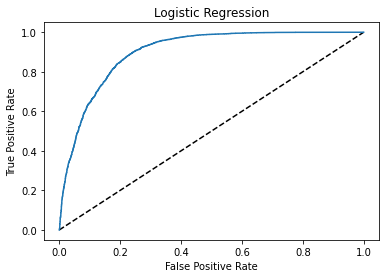

In [145]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

y_pred_prob=LR.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

### Random Forest Classifier Model

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
#print(accuracy_score(y_test,predrf))
print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))   
print(classification_report(y_test,predrf))

0.8829273103856398
[[4474  610]
 [ 577 4476]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      5084
           1       0.88      0.89      0.88      5053

    accuracy                           0.88     10137
   macro avg       0.88      0.88      0.88     10137
weighted avg       0.88      0.88      0.88     10137



### Random  Forest Cross Validation 

In [149]:
scr = cross_val_score(rf,x,y,scoring='f1',cv=4)   #cv for 5 split 
print("Corss validation scre for Random Forest", scr.mean())

Corss validation scre for Random Forest 0.8847511056720574


### AUC ROC CURVE Random Forest Classification

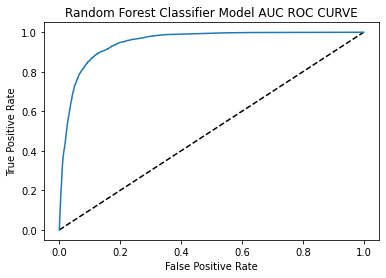

In [150]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier Model AUC ROC CURVE")
plt.show()

### K Nearest Neighbors Classifier

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(f1_score(y_test,predknn))
#print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.852074286242262
[[3925 1159]
 [ 442 4611]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      5084
           1       0.80      0.91      0.85      5053

    accuracy                           0.84     10137
   macro avg       0.85      0.84      0.84     10137
weighted avg       0.85      0.84      0.84     10137



### KNN Cross Validation

In [152]:
scr = cross_val_score(knn,x,y,scoring="f1",cv=4)   #cv for 5 split 
print("Corss validation scre for Knearest Neigbour Classification", scr.mean())

Corss validation scre for Knearest Neigbour Classification 0.8600870226833038


### AUC ROC CURVE

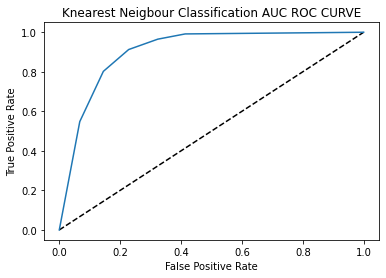

In [153]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Knearest Neigbour Classification AUC ROC CURVE")
plt.show()

## Support Vactor Machine Classification Model


In [155]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print(f1_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))   
print(classification_report(y_test,predsv))

0.8496864625599411
[[3900 1184]
 [ 446 4607]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      5084
           1       0.80      0.91      0.85      5053

    accuracy                           0.84     10137
   macro avg       0.85      0.84      0.84     10137
weighted avg       0.85      0.84      0.84     10137



## Cross Validation SVC

In [156]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(sv,x,y,scoring="f1",cv=4)   #cv for 5 split 
print("Corss validation scre for support vector", scr.mean())

Corss validation scre for support vector 0.8514029219677782


## AUC ROC CURVE FOR SVC

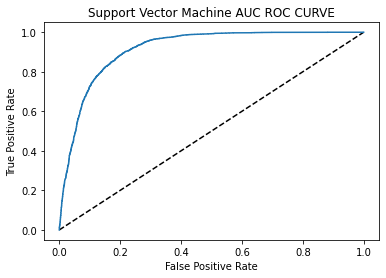

In [157]:
model = SVC()
model.probability = True
model.fit(x_train,y_train)
y_pred_prob=model.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine AUC ROC CURVE")
plt.show()

### Adaboost Classifier Model

In [161]:
from sklearn.ensemble import AdaBoostClassifier
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad = ad.predict(x_test)
print(f1_score(y_test,predad))
#print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8621639593426427
[[4148  936]
 [ 515 4538]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      5084
           1       0.83      0.90      0.86      5053

    accuracy                           0.86     10137
   macro avg       0.86      0.86      0.86     10137
weighted avg       0.86      0.86      0.86     10137



### Cross validation Adaboos Classifier Model

In [162]:
scr = cross_val_score(ad,x,y,scoring="f1",cv=4)   #cv for 5 split 
print("Corss validation scre for support vector", scr.mean())

Corss validation scre for support vector 0.8528590727763246


## Adaboos Classifier Model AUC ROC CURVE

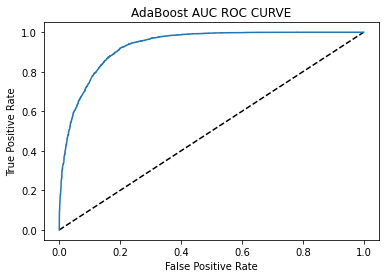

In [163]:
model = AdaBoostClassifier()
model.probability = True
model.fit(x_train,y_train)
y_pred_prob=model.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoost AUC ROC CURVE")
plt.show()

In [164]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(f1_score(y_test,preddt))
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))   
print(classification_report(y_test,preddt))

0.8522206731726747
0.8536056032356713
[[4374  710]
 [ 774 4279]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5084
           1       0.86      0.85      0.85      5053

    accuracy                           0.85     10137
   macro avg       0.85      0.85      0.85     10137
weighted avg       0.85      0.85      0.85     10137



In [166]:
scr = cross_val_score(dt,x,y,scoring="f1",cv=4)   #cv for 5 split 
print("Corss validation scre for support vector", scr.mean())

Corss validation scre for support vector 0.8410719494747001


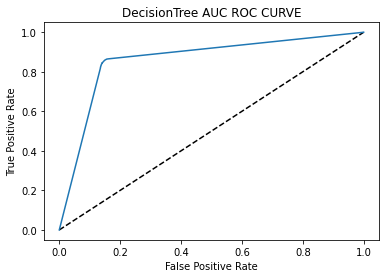

In [167]:
model = DecisionTreeClassifier()
#model.probability = True
model.fit(x_train,y_train)
y_pred_prob=model.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DecisionTree AUC ROC CURVE")
plt.show()

### Observation:-
Higest accuracy score is coming for Random Forest Classification model, hence this is the best model we can use. AUC ROC CURVE also showing highest area cover by Random Forest prediction.
Cross validation score is also having same number for randome forest.

## Hyper parameter tuning for Random Forest Classifier Model

In [168]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
parameters = {"n_estimators":[100,150], 'criterion' : ['gini', 'entropy'],
              "max_depth":[10,25],"min_samples_split":[2,4]
            ,"max_features":['auto', 'sqrt'],"min_samples_leaf":[1,3] }
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=104)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(rf, parameters , cv = 5, scoring="f1",verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Score: 0.8892715648254876
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


# Saving Best Model

In [823]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth= 35, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=2, n_estimators= 150)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))   
print(classification_report(y_test,predrf))

0.8861748417721519
[[4457  647]
 [ 504 4504]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5104
           1       0.87      0.90      0.89      5008

    accuracy                           0.89     10112
   macro avg       0.89      0.89      0.89     10112
weighted avg       0.89      0.89      0.89     10112



In [824]:
import joblib 
joblib.dump(rf,'Census_income.pki')

['Census_income.pki']

In [825]:
model = joblib.load('Census_income.pki')

In [826]:
prediction = model.predict(x_test)

In [827]:
prediction = pd.DataFrame(prediction)

In [828]:
prediction.to_csv('Result.csv')